# 1 Introduction

## 1.1 Project Overview

## 1.2 Objective of the Models

---

# 2 Data Collection

## 2.1 Data Sources

#### Politifact dataset from Kaggle

The PolitiFact dataset available on Kaggle is a comprehensive collection of fact-checked statements, compiled from the PolitiFact website. This dataset encompasses a wide range of data, amounting to approximately 19.4K entries, covering a period from 2008 to 2021. It represents a significant source of information for the analysis and detection of misinformation in the political sphere. Each entry in the dataset is derived from statements made by politicians, public figures, and various organizations, which have been rigorously evaluated and fact-checked by PolitiFact's team.

## 2.2 Acquiring The Dataset

#### Libraries Import and Packages Installation

In [1]:
import pandas as pd

In [2]:
# File path
file_path = "dataset/politifact.csv"

column_names = ['no', 'sources', 'sources_dates', 'sources_post_location',
                'sources_quote', 'curator_name', 'curated_date', 'facts',
                'sources_url', 'curators_article_title', 'curator_complete_article',
                'curator_tags']

# Read the CSV file using pandas
politifact_df = pd.read_csv(file_path, names=column_names, delimiter=',', header=0)

# Display the first 3 rows of the politifact_df
politifact_df.head(3)

,no,sources,sources_dates,sources_post_location,sources_quote,curator_name,curated_date,facts,sources_url,curators_article_title,curator_complete_article,curator_tags
0,0,Viral image,2021-03-20 00:00:00,a Facebook post:\n,\nSays Disneyland is enforcing a “no scream” p...,Ciara O'Rourke,2021-03-22 00:00:00,false,https://www.politifact.com/factchecks/2021/mar...,"\nNo, Disneyland isn’t enforcing a ‘no scream’...",\nBack in July a Japanese amusement park drew ...,"Facebook Fact-checks,Coronavirus,Viral image"
1,1,Viral image,2021-01-24 00:00:00,a Facebook post:\n,\nVideo “proves 100% that President Joe Biden ...,Ciara O'Rourke,2021-03-22 00:00:00,pants-fire,https://www.politifact.com/factchecks/2021/mar...,"\nNo, this video doesn’t prove Biden isn’t hum...",\nA recent Facebook post uses a video clip of ...,"Facebook Fact-checks,Viral image"
2,2,Terry McAuliffe,2021-03-10 00:00:00,a speech:\n,\n“If you look at the average teacher pay comp...,Warren Fiske,2021-03-22 00:00:00,true,https://www.politifact.com/factchecks/2021/mar...,\nVa. teachers pay ranks last in U.S. compared...,"\n""If you look at the average teacher pay comp...","Education,Income,Wealth,Virginia,Terry McAuliffe"


# 3 Exploratory Data Analysis

#### Libraries Import and Packages Installation

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## 3.1 Overview of the Dataset

### 3.1.1 General Statistics

In [4]:
# Get size of the dataset
dataset_size = politifact_df.shape

# Print
print("Dataset Set Size:", dataset_size)

Dataset Set Size: (19422, 12)


In [5]:
# Get cardinality of the dataset
politifact_df.nunique()

no                          19422
sources                      4395
sources_dates                4378
sources_post_location        4437
sources_quote               19397
curator_name                  521
curated_date                 3970
facts                           9
sources_url                 19421
curators_article_title      19395
curator_complete_article    19353
curator_tags                15675
dtype: int64

In [6]:
# Get summary of the dataset
politifact_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19422 entries, 0 to 19421
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no                        19422 non-null  int64 
 1   sources                   19422 non-null  object
 2   sources_dates             19099 non-null  object
 3   sources_post_location     19261 non-null  object
 4   sources_quote             19422 non-null  object
 5   curator_name              19400 non-null  object
 6   curated_date              19333 non-null  object
 7   facts                     19422 non-null  object
 8   sources_url               19422 non-null  object
 9   curators_article_title    19417 non-null  object
 10  curator_complete_article  19376 non-null  object
 11  curator_tags              19417 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.8+ MB


## 3.2 Target Variable Analysis

### 3.2.1 Distribution of Labels

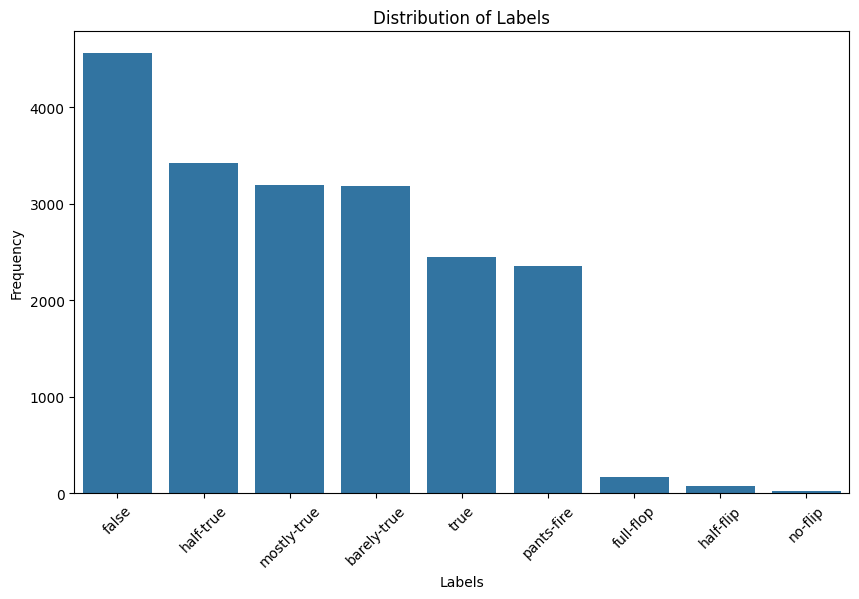

facts
false          4556
half-true      3419
mostly-true    3195
barely-true    3178
true           2445
pants-fire     2358
full-flop       171
half-flip        72
no-flip          28
Name: count, dtype: int64


In [7]:
# Count the frequency of each unique value in the 'label' column of train_df
label_counts = politifact_df['facts'].value_counts()

# Plot the graph
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Print the frequency
print(label_counts)

## 3.3 Textual Content Analysis

### 3.3.1 Text Length Analysis

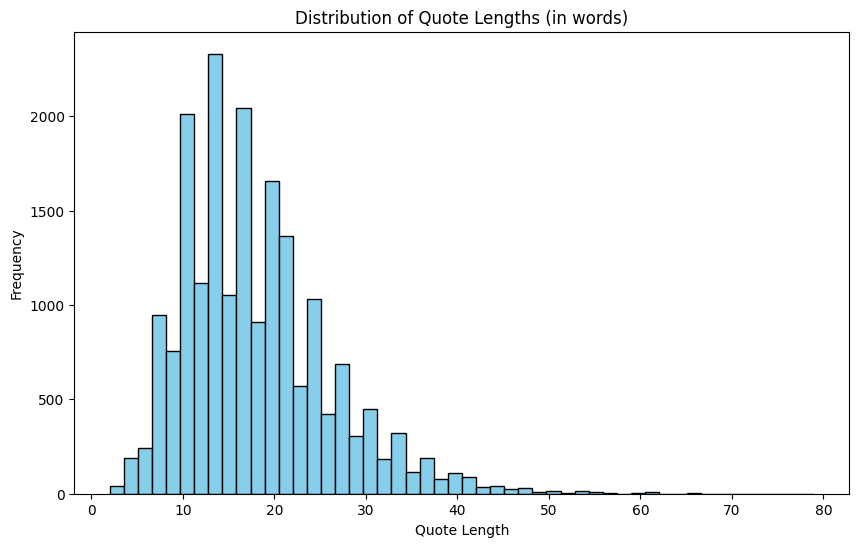

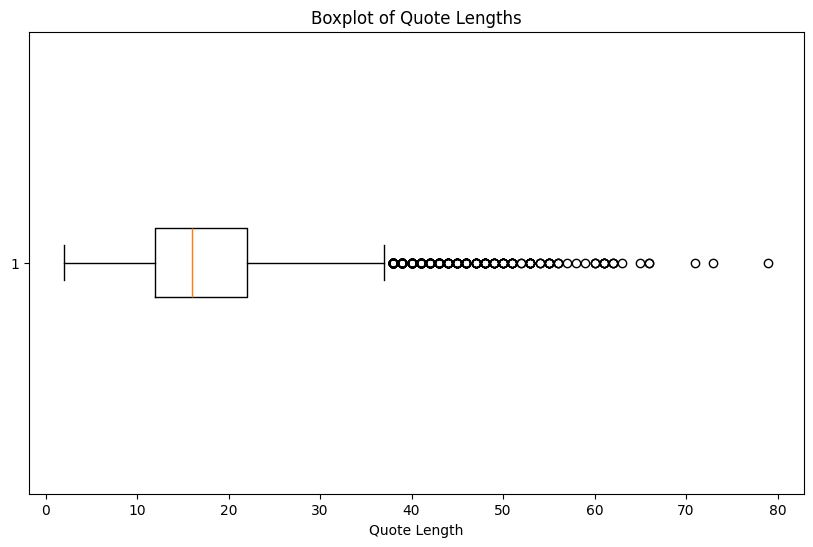

In [8]:
# Calculate the length of each statement
politifact_df['sources_quote_length'] = politifact_df['sources_quote'].apply(lambda x: len(x.split()))

# Plotting the distribution of statement lengths
plt.figure(figsize=(10, 6))
plt.hist(politifact_df['sources_quote_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Quote Lengths (in words)')
plt.xlabel('Quote Length')
plt.ylabel('Frequency')

# Display the plot
plt.show()

# Alternatively, you can use a boxplot to see the distribution
plt.figure(figsize=(10, 6))
plt.boxplot(politifact_df['sources_quote_length'], vert=False)
plt.title('Boxplot of Quote Lengths')
plt.xlabel('Quote Length')

# Display the plot
plt.show()

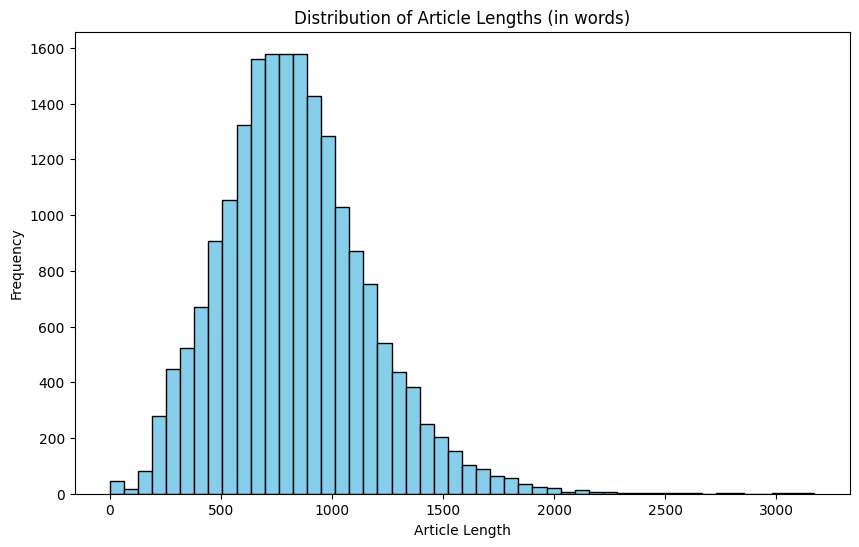

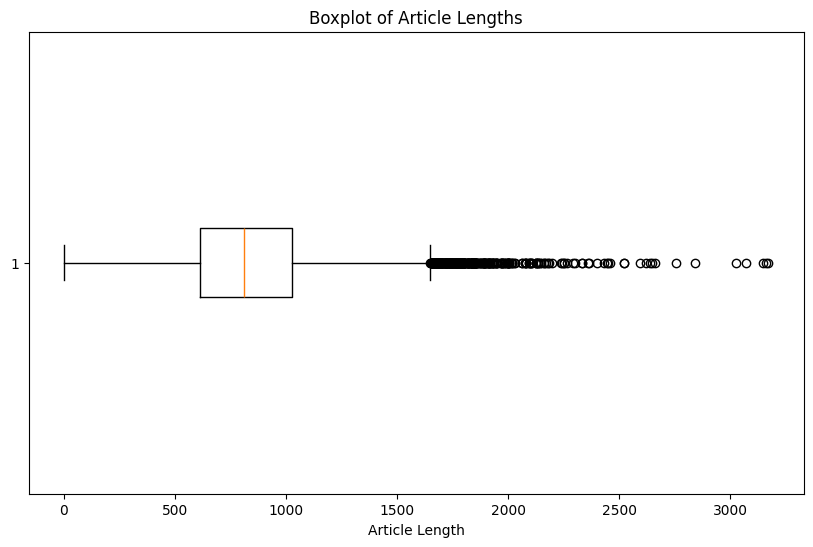

In [9]:
# Calculate the length of each statement
politifact_df['curator_complete_article_length'] = politifact_df['curator_complete_article'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

# Plotting the distribution of statement lengths
plt.figure(figsize=(10, 6))
plt.hist(politifact_df['curator_complete_article_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Article Lengths (in words)')
plt.xlabel('Article Length')
plt.ylabel('Frequency')

# Display the plot
plt.show()

# Alternatively, you can use a boxplot to see the distribution
plt.figure(figsize=(10, 6))
plt.boxplot(politifact_df['curator_complete_article_length'], vert=False)
plt.title('Boxplot of Article Lengths')
plt.xlabel('Article Length')

# Display the plot
plt.show()

### 3.3.2 Word Frequency Analysis

         word  frequency
25        the      14846
31         of       8559
101        in       8446
30         to       8336
4           a       6583
60        and       5313
0        Says       4783
64        for       3671
14       that       3235
2          is       3205
8          on       2300
229      have       2161
107       are       2084
274       has       1924
154      than       1840
152       was       1662
319      from       1475
711        by       1473
92       with       1456
6168  percent       1407


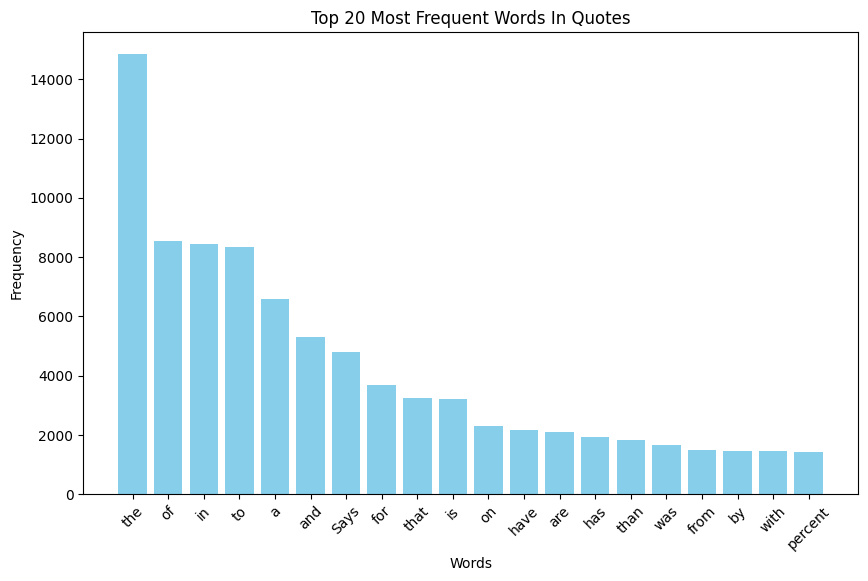

In [10]:
# Tokenize the text and count word occurrences
word_counts = Counter(word for quote in politifact_df['sources_quote'] for word in quote.split())

# Convert to a DataFrame for easy handling
word_freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)

# Display top 20 words
print(word_freq_df.head(20))

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(word_freq_df['word'].head(20), word_freq_df['frequency'].head(20), color='skyblue')
plt.title('Top 20 Most Frequent Words In Quotes')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Display the plot
plt.show()

     word  frequency
24    the     866215
14     to     407499
29     of     395763
3       a     343794
1      in     305347
78    and     291121
32   that     245982
9     for     168783
297    is     142322
44     on     135785
132   The     105397
27    was      97127
72     as      86251
231    by      81296
88   with      78703
96   from      77220
91    not      75420
324  said      72541
102    it      72170
23     at      68258


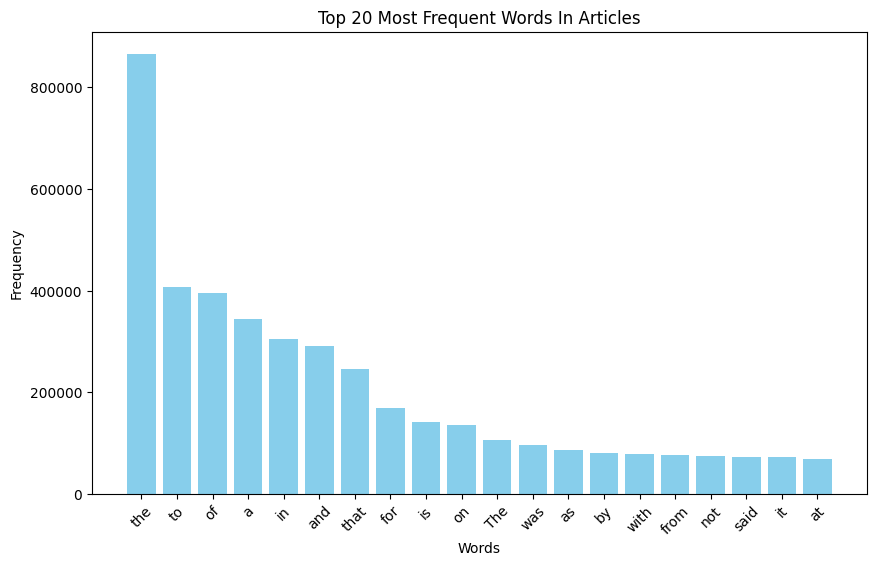

In [11]:
# Tokenize the text and count word occurrences
word_counts = Counter(word for article in politifact_df['curator_complete_article'] if isinstance(article, str) for word in article.split())

# Convert to a DataFrame for easy handling
word_freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)

# Display top 20 words
print(word_freq_df.head(20))

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(word_freq_df['word'].head(20), word_freq_df['frequency'].head(20), color='skyblue')
plt.title('Top 20 Most Frequent Words In Articles')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Display the plot
plt.show()

## 3.4 Contextual Analysis

### 3.4.1 Subject Matter Analysis

facts                                               barely-true  false  \
curator_tags                                                             
Facebook Fact-checks,Facebook posts                          13     57   
Facebook Fact-checks,Coronavirus,Facebook posts               9     41   
Public Health,Facebook Fact-checks,Coronavirus,...           12     41   
Facebook Fact-checks,Viral image                              8     37   
Facebook Fact-checks,Coronavirus,Viral image                  4     26   
Fake news,Facebook Fact-checks,Bloggers                       9     24   
Fake news,Facebook Fact-checks,Facebook posts                 7     22   
Elections,Facebook Fact-checks,Facebook posts                 5     21   
Fake news,PunditFact,Bloggers                                 7     19   
Elections,Facebook Fact-checks,Viral image                    0     18   
History,Facebook Fact-checks,Viral image                      2     13   
Immigration,National,Homeland Security

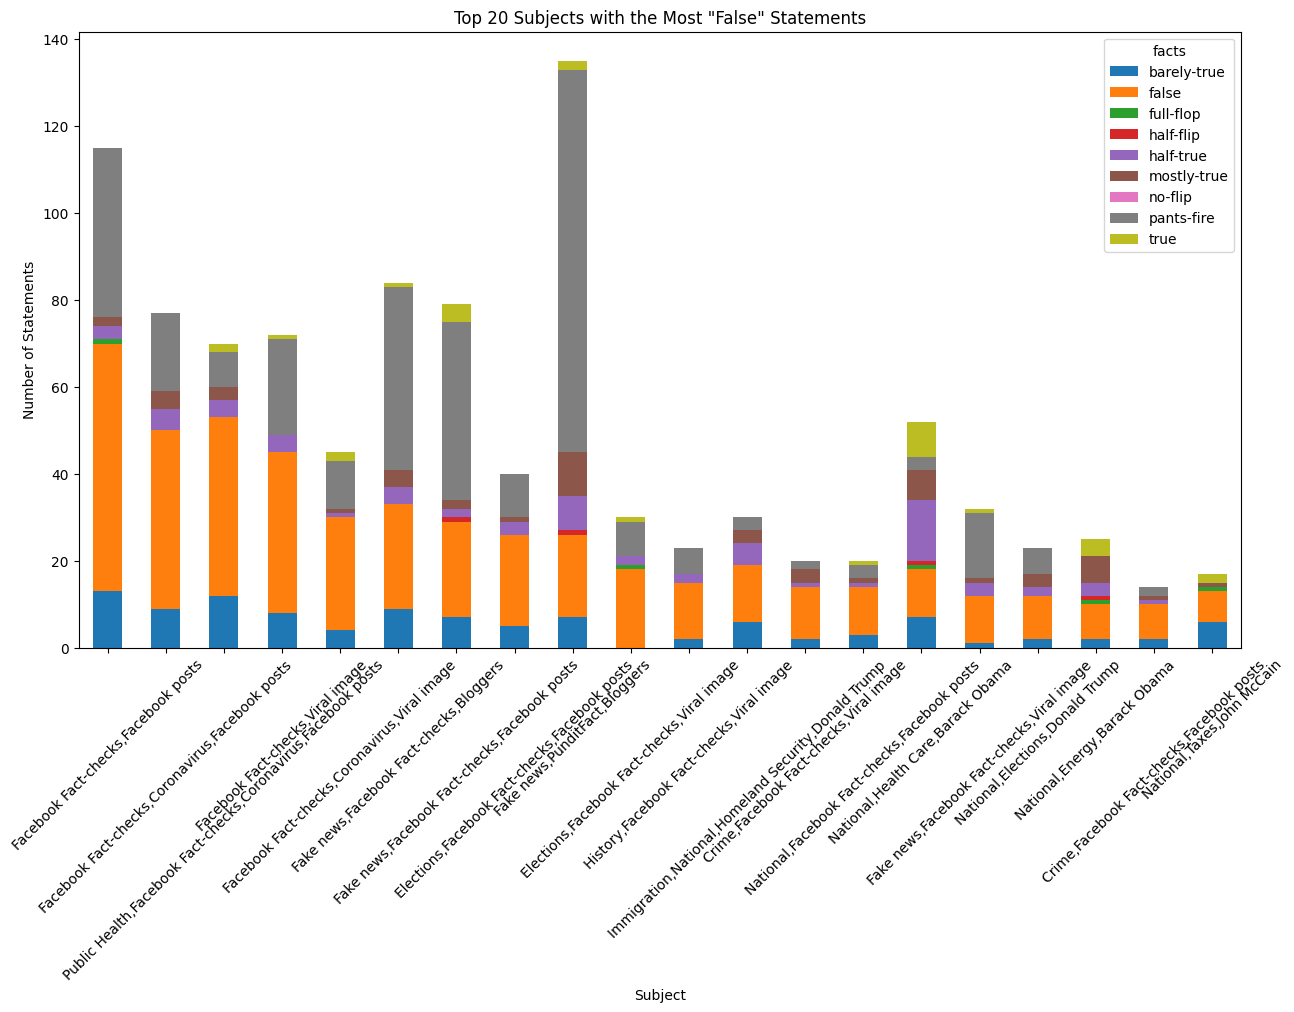

In [12]:
# Count the number of occurrences of each label for each subject
subject_label_counts = politifact_df.groupby(['curator_tags', 'facts']).size().unstack(fill_value=0)

# Sorting by a specific label, for example, 'false' statements
subject_label_counts = subject_label_counts.sort_values(by='false', ascending=False)

# Display top N subjects with the most 'false' statements
print(subject_label_counts.head(20))

# Plot for the top N subjects
top_subjects = subject_label_counts.head(20)
top_subjects.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Top 20 Subjects with the Most "False" Statements')
plt.xlabel('Subject')
plt.ylabel('Number of Statements')
plt.xticks(rotation=45)

# Display the plot
plt.show()

# 4 Feature Engineering

#### Libraries Import and Packages Installation

In [13]:
import re
import string

from nltk import download as nltk_download
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from scipy.sparse import csr_matrix, hstack
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

nltk_download('punkt')
nltk_download('stopwords')
nltk_download('wordnet')
nltk_download('averaged_perceptron_tagger')
nltk_download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/winsonchow/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/winsonchow/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/winsonchow/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/winsonchow/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/winsonchow/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## 4.1 Data Cleaning

### 4.1.1 Dropping Uncommon Categories

In [14]:
# Categories to drop
categories_to_drop = ["full-flop", "no-flip", "half-flip"]

# Boolean indexing to filter out unwanted categories
politifact_df = politifact_df[~politifact_df['facts'].isin(categories_to_drop)]

In [15]:
label_counts = politifact_df['facts'].value_counts()
print(label_counts)

facts
false          4556
half-true      3419
mostly-true    3195
barely-true    3178
true           2445
pants-fire     2358
Name: count, dtype: int64


### 4.1.2 Merging Labels

In [16]:
# Create a mapping of categories to be merged and renamed
category_mapping = {
    'pants-fire': 'false',  # Merging 'pants-fire' into 'false'
    'barely-true': 'mixture',  # Renaming 'barely-true' to 'mixture'
    'half-true': 'mixture',  # Renaming 'half-true' to 'mixture'
    'mostly-true': 'true'  # Merging 'mostly-true' into 'true'
}

# Replace the categories in the DataFrame using the mapping
politifact_df['facts'] = politifact_df['facts'].replace(category_mapping)

In [17]:
label_counts = politifact_df['facts'].value_counts()
print(label_counts)

facts
false      6914
mixture    6597
true       5640
Name: count, dtype: int64


### 4.1.3 Dropping Irrelevant Columns

In [18]:
# Defining columns to drop
columns_to_drop = ['no', 'sources_dates', 'curator_name', 'curated_date', 
                   'sources_url', 'curators_article_title']

# Drop columns
politifact_df.drop(columns_to_drop, axis=1, inplace=True)

### 4.1.4 Handling Missing Values

In [19]:
# Drop rows with missing values and reset index in place
politifact_df.dropna(inplace=True)
politifact_df.reset_index(drop=True, inplace=True)

# Check for missing values
missing_values = politifact_df.isnull().sum()

# Print the findings
print(f"Missing values in dataset:\n{missing_values}\n")

Missing values in dataset:
sources                            0
sources_post_location              0
sources_quote                      0
facts                              0
curator_complete_article           0
curator_tags                       0
sources_quote_length               0
curator_complete_article_length    0
dtype: int64



### 4.1.5 Removing Line Breakers

In [20]:
# Remove newline characters from 'sources_quote' and 'curator_complete_article'
politifact_df['sources_quote'] = politifact_df['sources_quote'].str.replace(r'\n', '', regex=True)
politifact_df['curator_complete_article'] = politifact_df['curator_complete_article'].str.replace(r'\n', '', regex=True)

# Remove newline characters from 'sources_post_location' at the end of the string
politifact_df['sources_post_location'] = politifact_df['sources_post_location'].str.replace(r'\n$', '', regex=True)

In [21]:
politifact_df.head(3)

,sources,sources_post_location,sources_quote,facts,curator_complete_article,curator_tags,sources_quote_length,curator_complete_article_length
0,Viral image,a Facebook post:,Says Disneyland is enforcing a “no scream” pol...,false,Back in July a Japanese amusement park drew at...,"Facebook Fact-checks,Coronavirus,Viral image",11,512
1,Viral image,a Facebook post:,Video “proves 100% that President Joe Biden is...,false,A recent Facebook post uses a video clip of a ...,"Facebook Fact-checks,Viral image",12,303
2,Terry McAuliffe,a speech:,“If you look at the average teacher pay compar...,true,"""If you look at the average teacher pay compar...","Education,Income,Wealth,Virginia,Terry McAuliffe",19,613


## 4.2 Data Preprocessing

### 4.2.1 Merging Key Columns

In [22]:
def create_statement(row):
    sources = f"{row['sources']} in " if not pd.isna(row['sources']) else ''
    sources_post_location = f"{row['sources_post_location']} " if not pd.isna(row['sources_post_location']) else ''
    sources_quote = row['sources_quote'] if not pd.isna(row['sources_quote']) else ''

    return f"{sources}{sources_post_location}{sources_quote}"

# Apply the function across the DataFrame rows
politifact_df['quotes'] = politifact_df.apply(create_statement, axis=1)

In [23]:
def create_article(row):
    context = f"Context: {row['curator_complete_article']}" if not pd.isna(row['curator_complete_article']) else ''
    subject = f" Subject: {row['curator_tags']}" if not pd.isna(row['curator_tags']) else ''
    return f"{context}{subject}" if context or subject else ''

# Apply the function across the DataFrame rows
politifact_df['articles'] = politifact_df.apply(create_article, axis=1)

In [24]:
# Combine 'statement' and 'context' into one column
politifact_df['combined_statements'] = politifact_df['quotes'] + ' ' + politifact_df['articles']

In [25]:
# Defining columns to drop
columns_to_drop = ['sources', 'sources_post_location', 'sources_quote', 'curator_complete_article', 
                   'curator_tags', 'sources_quote_length', 'curator_complete_article_length']

# Drop columns
politifact_df.drop(columns_to_drop, axis=1, inplace=True)

In [26]:
politifact_df.head()

,facts,quotes,articles,combined_statements
0,false,Viral image in a Facebook post: Says Disneyla...,Context: Back in July a Japanese amusement par...,Viral image in a Facebook post: Says Disneyla...
1,false,Viral image in a Facebook post: Video “proves...,Context: A recent Facebook post uses a video c...,Viral image in a Facebook post: Video “proves...
2,true,Terry McAuliffe in a speech: “If you look at ...,"Context: ""If you look at the average teacher p...",Terry McAuliffe in a speech: “If you look at ...
3,mixture,TikTok posts in a video caption: “You will ne...,Context: A popular TikTok video said that if y...,TikTok posts in a video caption: “You will ne...
4,mixture,Mike Bost in a radio The American Rescue Pla...,Context: After failing to stop the $1.9 trilli...,Mike Bost in a radio The American Rescue Pla...


### 4.2.2 Text Cleaning

In [27]:
def text_cleaning(text):
    """
    Remove punctuation, special symbols, and numbers from the text.

    Parameters:
    text (str): The text to be cleaned.

    Returns:
    str: The cleaned text.
    """
    # Change all text to lowercase
    text = text.lower()
    
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    return text

In [28]:
politifact_df['cleaned_combined_statements'] = politifact_df['combined_statements'].apply(text_cleaning)

### 4.2.3 Lemmatisation

In [29]:
# Function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    # Tokenize the text
    word_list = word_tokenize(text)
    # Get pos tags for each of the word
    nltk_tagged = pos_tag(word_list)  
    
    # Tuple of (word, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            # if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            # else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [30]:
politifact_df['cleaned_combined_statements'] = politifact_df['cleaned_combined_statements'].apply(lemmatize_text)

### 4.2.4 Stop Words Removal

In [31]:
def remove_stop_words(text):
    """
    Remove stop words from a string of text.

    Parameters:
    text (str): The string of word tokens.

    Returns:
    str: A new string with stop words removed.
    """
    # Get the list of stop words
    stopwords_english = set(stopwords.words('english'))

    # Tokenize the text
    tokens = word_tokenize(text)

    # Filter out the stop words from the list of tokens
    filtered_tokens = [word for word in tokens if word.lower() not in stopwords_english]

    # Join the tokens back into a string
    filtered_text = ' '.join(filtered_tokens)

    return filtered_text

In [32]:
politifact_df['cleaned_combined_statements'] = politifact_df['cleaned_combined_statements'].apply(remove_stop_words)

### 4.2.5 Converting Categorical Data to Numeric Data

In [33]:
politifact_df['facts'] = politifact_df['facts'].astype('category').cat.codes

## 4.3 Feature Extraction

### 4.3.1 Initial Data Splitting

In [34]:
# Split the original dataframe into training and a temporary set (test + validation)
train_df, temp_df = train_test_split(politifact_df, test_size=0.3, random_state=42)

# Split the temporary set into actual test and validation sets
test_df, valid_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Load all dataframes into an array for easier access
dataframes = [train_df, valid_df, test_df]

### 4.3.2 Feature 1: Sentiment Features

In [35]:
# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

In [36]:
# Apply get_sentiment_score function to the 'statement' column of each DataFrame
for df in dataframes:
    df['sentiment_score'] = df['combined_statements'].apply(get_sentiment_score)

In [37]:
# Extract sentiment features
sentiment_score_train = csr_matrix(train_df['sentiment_score'].values.reshape(-1, 1))
sentiment_score_valid = csr_matrix(valid_df['sentiment_score'].values.reshape(-1, 1))
sentiment_score_test = csr_matrix(test_df['sentiment_score'].values.reshape(-1, 1))

### 4.3.3 Feature 2: TF-IDF Features

In [38]:
# Initialize TfidfVectorizers
vectorizer = TfidfVectorizer()

# Fit and transform the 'statement' column for the training data
tfidf_features_statement_train = vectorizer.fit_transform(train_df['cleaned_combined_statements'])

# Transform the 'statement' column for the testing and validation data
tfidf_features_statement_valid = vectorizer.transform(valid_df['cleaned_combined_statements'])
tfidf_features_statement_test = vectorizer.transform(test_df['cleaned_combined_statements'])

### 4.3.4 Merging Features

In [39]:
# Combine TF-IDF features with sentiment score
combined_features_train = hstack([tfidf_features_statement_train, sentiment_score_train])
combined_features_valid = hstack([tfidf_features_statement_valid, sentiment_score_valid])
combined_features_test = hstack([tfidf_features_statement_test, sentiment_score_test])

# 5 Building a Baseline: Random Forest

#### Libraries Import and Packages Installation

In [40]:
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.metrics import (
    accuracy_score,
    f1_score, 
    precision_score, 
    recall_score,
    classification_report, 
    confusion_matrix,
)

from utils import print_evaluation_metrics

## 5.1 Model Development

### 5.1.1 Data Balancing Using SMOTE

In [41]:
X_train = combined_features_train
X_test = combined_features_test

y_train = train_df['facts']
y_test = test_df['facts']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit SMOTE on the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

## 5.2 Model Training

### 5.2.1 Grid Search

In [42]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=0, 
                           scoring='accuracy')

# Fit GridSearchCV on the balanced training data
grid_search.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

### 5.2.2 Best Parameters

In [43]:
# Find the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [44]:
# Initialize the classifier with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)

## 5.3 Model Evaluation

### 5.3.1 5-Fold Cross Validation

In [45]:
# Define the scoring metrics
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_rf, 
                            X_train_smote, 
                            y_train_smote, 
                            cv=5, 
                            scoring='accuracy', 
                            verbose=0)

# Print cross-validation results
print("Cross-validation accuracy scores:", cv_scores)

Cross-validation accuracy scores: [0.63384189 0.62933426 0.61615811 0.61498439 0.70794311]


### 5.3.2 Performance Metrics Analysis

In [46]:
# Retrain on the entire training set
best_rf.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

In [47]:
# Print the evaluation metrics
print_evaluation_metrics(y_test, y_pred)

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.57      0.63      1027
           1       0.53      0.61      0.57       963
           2       0.55      0.58      0.57       854

    accuracy                           0.59      2844
   macro avg       0.60      0.59      0.59      2844
weighted avg       0.60      0.59      0.59      2844

Accuracy: 58.68%
Precision: 0.60
Recall: 0.59
F1-Score: 0.59


# 6 Deep Learning

#### Libraries Import and Packages Installation

In [48]:
# Standard library imports
from itertools import product

# Imports for data manipulation and model evaluation
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

# Imports for imbalanced dataset handling
from imblearn.over_sampling import SMOTE

# Imports for bayesian optimization
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

# Imports for progress bar
from tqdm import tqdm

# PyTorch imports for deep learning
import torch
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import DataLoader, Dataset, TensorDataset

# PyTorch Vision for image-based datasets
import torchvision

# PyTorch Text for natural language processing
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

# Local imports
from utils import train_and_evaluate
from utils import print_evaluation_metrics

/Users/winsonchow/Documents/GitHub/fake_news_detection/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [49]:
# Set up device agnostic code
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

print(f"Your device is using {device} to train the models")

Your device is using mps to train the models


## 6.1 Data Pre-processing

### 6.1.1 Building the Vocabulary

In [50]:
# Function to iterate over tokenized text
def yield_tokens(dataframes):
    for df in dataframes:
        for statement in df['cleaned_combined_statements']:
            yield tokenizer(statement)

# Create tokenizer
tokenizer = get_tokenizer('basic_english')

# Build vocabulary
vocab = build_vocab_from_iterator(yield_tokens(dataframes), specials=['<unk>', '<pad>'], min_freq=2)

# Optional: print out the size of the vocabulary
print(f"Size of vocabulary: {len(vocab)}")

Size of vocabulary: 100467


### 6.1.2 Adding Padding

In [51]:
def tokenize_and_pad(text, tokenizer, vocab, max_length):
    """
    Tokenize and pad a text sequence to a fixed length.

    Args:
    text (str): The text to be tokenized.
    tokenizer (callable): The tokenizer function.
    vocab (Vocab): The vocabulary object.
    max_length (int): The fixed length to pad the sequences to.

    Returns:
    list: A list of token indices, padded to `max_length`.
    """
    # Tokenize the text
    tokens = tokenizer(text)

    # Convert tokens to indices
    token_indices = [vocab[token] if token in vocab else vocab['<unk>'] for token in tokens]

    # Pad or truncate the sequence
    padded = token_indices[:max_length] if len(token_indices) > max_length else token_indices + [vocab['<pad>']] * (max_length - len(token_indices))
    
    return padded

In [52]:
max_length = 1028

# Tokenize and pad the sequences in each dataframe
train_df['tokenized_and_padded_statements'] = train_df['cleaned_combined_statements'].apply(lambda x: tokenize_and_pad(x, tokenizer, vocab, max_length))
valid_df['tokenized_and_padded_statements'] = valid_df['cleaned_combined_statements'].apply(lambda x: tokenize_and_pad(x, tokenizer, vocab, max_length))
test_df['tokenized_and_padded_statements'] = test_df['cleaned_combined_statements'].apply(lambda x: tokenize_and_pad(x, tokenizer, vocab, max_length))

### 6.1.3 Merging Features

In [53]:
# Define a function to append the sentiment score
def append_sentiment_score(tokenized_padded_list, sentiment_score):
    # Append the sentiment score to the tokenized and padded list
    return tokenized_padded_list + [sentiment_score]

In [54]:
# Apply the function to each dataframe
train_df['features'] = train_df.apply(lambda row: append_sentiment_score(row['tokenized_and_padded_statements'], row['sentiment_score']), axis=1)
valid_df['features'] = valid_df.apply(lambda row: append_sentiment_score(row['tokenized_and_padded_statements'], row['sentiment_score']), axis=1)
test_df['features'] = test_df.apply(lambda row: append_sentiment_score(row['tokenized_and_padded_statements'], row['sentiment_score']), axis=1)

### 6.1.4 Converting Dataset to PyTorch Tensors

In [55]:
# Convert features and labels to tensors for the training set
X_train_tensor = torch.tensor(train_df['features'].tolist(), dtype=torch.long)
y_train_tensor = torch.tensor(train_df['facts'].values, dtype=torch.long)

# Convert features and labels to tensors for the validation set
X_valid_tensor = torch.tensor(valid_df['features'].tolist(), dtype=torch.long)
y_valid_tensor = torch.tensor(valid_df['facts'].values, dtype=torch.long)

# Convert features and labels to tensors for the test set
X_test_tensor = torch.tensor(test_df['features'].tolist(), dtype=torch.long)
y_test_tensor = torch.tensor(test_df['facts'].values, dtype=torch.long)

/var/folders/qy/1t1mmmfn3ys3lwxkx12904f80000gn/T/ipykernel_63585/1175158349.py:2: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  X_train_tensor = torch.tensor(train_df['features'].tolist(), dtype=torch.long)
/var/folders/qy/1t1mmmfn3ys3lwxkx12904f80000gn/T/ipykernel_63585/1175158349.py:6: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  X_valid_tensor = torch.tensor(valid_df['features'].tolist(), dtype=torch.long)
/var/folders/qy/1t1mmmfn3ys3lwxkx12904f80000gn/T/ipykernel_63585/1175158349.py:10: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  X_test_tensor = torch.tensor(test_df['features'].tolist(), dtype=torch

### 6.1.5 Create TensorDataset

In [56]:
print("Train statement tensor shape:", X_train_tensor.shape)
print("Train labels tensor shape:", y_train_tensor.shape)

print("Valid features tensor shape:", X_valid_tensor.shape)
print("valid labels tensor shape:", y_valid_tensor.shape)

print("Test features tensor shape:", X_test_tensor.shape)
print("Test labels tensor shape:", y_test_tensor.shape)

Train statement tensor shape: torch.Size([13270, 1029])
Train labels tensor shape: torch.Size([13270])
Valid features tensor shape: torch.Size([2844, 1029])
valid labels tensor shape: torch.Size([2844])
Test features tensor shape: torch.Size([2844, 1029])
Test labels tensor shape: torch.Size([2844])


In [57]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
valid_dataset = TensorDataset(X_valid_tensor, y_valid_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

### 6.1.6 Create DataLoader

In [58]:
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [59]:
# Iterate through the DataLoader
for batch in train_loader:
    # Unpack the batch
    features, fact = batch

    # Now you can use 'statements' and 'labels'
    print("Shape of data (X):", features.shape)
    print("Shape of target (y):", fact.shape)

    # Break after the first batch for demonstration
    break

Shape of data (X): torch.Size([32, 1029])
Shape of target (y): torch.Size([32])


## 6.2 Model Architecture

### 6.2.1 Attention Mechanism

In [60]:
class Attention(nn.Module):
    def __init__(self, input_dim):
        super(Attention, self).__init__()
        self.query = nn.Linear(input_dim, input_dim)
        self.key = nn.Linear(input_dim, input_dim)
        self.value = nn.Linear(input_dim, input_dim)

    def forward(self, inputs):
        # Generate query, key, value tensors
        queries = self.query(inputs)
        keys = self.key(inputs)
        values = self.value(inputs)

        # Calculate scores
        attn_scores = torch.matmul(queries, keys.transpose(-2, -1)) / torch.sqrt(torch.tensor(self.query.out_features, dtype=torch.float))

        # Softmax to get probabilities
        attn_probs = F.softmax(attn_scores, dim=-1)

        # Weighted sum
        weighted_sum = torch.matmul(attn_probs, values)

        # Sum over sequence length to get a fixed-size vector per batch
        return torch.sum(weighted_sum, dim=1)

### 6.2.2 Main Model Class

In [61]:
class FakeNewsDetector(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout, activation_fn=F.relu):
        super(FakeNewsDetector, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=n_layers, bidirectional=bidirectional, dropout=dropout, batch_first=True)
        self.attention = Attention(hidden_dim * 2 if bidirectional else hidden_dim)
        self.layer_norm = nn.LayerNorm(hidden_dim * 2 if bidirectional else hidden_dim)
        self.fc1 = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)
        self.activation_fn = activation_fn

    def forward(self, text):
        embedded = self.embedding(text)
        lstm_out, _ = self.lstm(embedded)
        
        # Apply attention
        attn_out = self.attention(lstm_out)

        # Apply layer normalization
        norm_out = self.layer_norm(attn_out)

        combined = self.activation_fn(self.fc1(norm_out))
        combined = self.dropout(combined)
        output = self.fc2(combined)

        return output

## 6.3 Model Training

### 6.3.1 Set Up Bayesian Optimization

In [62]:
# Hyperparmeters to explore
space = {
    'embedding_dim': hp.choice('embedding_dim', [100, 200, 300]),
    'hidden_dim': hp.choice('hidden_dim', [128, 256, 512]),
    'n_layers': hp.choice('n_layers', [2, 3, 4]),
    'bidirectional': hp.choice('bidirectional', [True, False]),
    'dropout': hp.uniform('dropout', 0, 0.5),
    'lr': hp.loguniform('lr', -10, -2),
}

# Predefined parameters
vocab_size = len(vocab)
output_dim = 3

In [63]:
def objective(params):
    model = FakeNewsDetector(vocab_size, 
                             params['embedding_dim'], 
                             params['hidden_dim'],
                             output_dim, 
                             params['n_layers'], 
                             params['bidirectional'], 
                             params['dropout'])

    num_epochs = 1
    
    optimizer = optim.Adam(model.parameters(), lr=params['lr'])
    criterion = nn.CrossEntropyLoss()

    predicted_labels, true_labels, valid_accuracy = train_and_evaluate(model, 
                                                                       train_loader, 
                                                                       valid_loader, 
                                                                       criterion, 
                                                                       optimizer, 
                                                                       num_epochs, 
                                                                       False)
    
    # Return the negative of the validation accuracy or validation loss.
    return {'loss': -valid_accuracy, 'status': STATUS_OK}

In [64]:
# Run the optimization
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10,  # Number of iterations
            trials=trials)

print("Best hyperparameters:", best)

  0%|                                    | 0/10 [00:00<?, ?trial/s, best loss=?]

Training:   0%|          | 0/415 [00:00<?, ?it/s]

Training:   0%|          | 1/415 [00:01<12:39,  1.83s/it]

Training:   0%|          | 2/415 [00:03<11:42,  1.70s/it]

Training:   1%|          | 3/415 [00:05<11:23,  1.66s/it]

Training:   1%|          | 4/415 [00:06<11:14,  1.64s/it]

Training:   1%|1         | 5/415 [00:08<11:16,  1.65s/it]

Training:   1%|1         | 6/415 [00:10<11:24,  1.67s/it]

Training:   2%|1         | 7/415 [00:11<11:17,  1.66s/it]

Training:   2%|1         | 8/415 [00:13<11:14,  1.66s/it]

Training:   2%|2         | 9/415 [00:14<11:12,  1.66s/it]

Training:   2%|2         | 10/415 [00:16<11:17,  1.67s/it]

Training:   3%|2         | 11/415 [00:18<11:06,  1.65s/it]

Training:   3%|2         | 12/415 [00:19<10:59,  1.64s/it]

Training:   3%|3         | 13/415 [00:21<10:55,  1.63s/it]

Training:   3%|3         | 14/415 [00:23<10:52,  1.63s/it]

Training:   4%|3         | 15/415 [00:24<11:05,  1.66s/it]

Training:   4%|3         | 16/415 [00:26<11:09,  1.68s/it]

Epoch 1/1, Training Loss: 1.0703, Validation Loss: 0.9138, Accuracy: 0.5847, Precision: 0.5800, Recall: 0.5847, F1 Score: 0.5747
Validation loss decreased (inf --> 0.913849).                                   
Training completed in 875.80 seconds.                                           
 10%|▌     | 1/10 [14:35<2:11:23, 875.92s/trial, best loss: -0.5847398030942335]

Training:   0%|          | 0/415 [00:00<?, ?it/s]

Training:   0%|          | 1/415 [00:03<22:43,  3.29s/it]

Training:   0%|          | 2/415 [00:06<22:48,  3.31s/it]

Training:   1%|          | 3/415 [00:09<22:21,  3.26s/it]

Training:   1%|          | 4/415 [00:12<21:56,  3.20s/it]

Training:   1%|1         | 5/415 [00:16<22:00,  3.22s/it]

Training:   1%|1         | 6/415 [00:19<21:57,  3.22s/it]

Training:   2%|1         | 7/415 [00:22<21:46,  3.20s/it]

Training:   2%|1         | 8/415 [00:25<21:39,  3.19s/it]

Training:   2%|2         | 9/415 [00:28<21:33,  3.19s/it]

Training:   2%|2         | 10/415 [00:32<21:27,  3.18s/it]

Training:   3%|2         | 11/415 [00:35<21:27,  3.19s/it]

Training:   3%|2         | 12/415 [00:38<21:29,  3.20s/it]

Training:   3%|3         | 13/415 [00:41<21:27,  3.20s/it]

Training:   3%|3         | 14/415 [00:44<21:27,  3.21s/it]

Training:   4%|3         | 15/415 [00:48<21:22,  3.21s/it]

Training:   4%|3         | 16/415 [00:51<21:24,  3.22s/it]

Epoch 1/1, Training Loss: 1.0636, Validation Loss: 1.0208, Accuracy: 0.4543, Precision: 0.5394, Recall: 0.4543, F1 Score: 0.3852
Validation loss decreased (inf --> 1.020781).                                   
Training completed in 1347.19 seconds.                                          
 20%|█    | 2/10 [37:03<2:33:45, 1153.23s/trial, best loss: -0.5847398030942335]

Training:   0%|          | 0/415 [00:00<?, ?it/s]

Training:   0%|          | 1/415 [00:03<24:01,  3.48s/it]

Training:   0%|          | 2/415 [00:06<22:55,  3.33s/it]

Training:   1%|          | 3/415 [00:09<22:28,  3.27s/it]

Training:   1%|          | 4/415 [00:13<22:19,  3.26s/it]

Training:   1%|1         | 5/415 [00:16<22:11,  3.25s/it]

Training:   1%|1         | 6/415 [00:19<22:06,  3.24s/it]

Training:   2%|1         | 7/415 [00:22<21:59,  3.24s/it]

Training:   2%|1         | 8/415 [00:26<21:50,  3.22s/it]

Training:   2%|2         | 9/415 [00:29<21:38,  3.20s/it]

Training:   2%|2         | 10/415 [00:32<21:29,  3.18s/it]

Training:   3%|2         | 11/415 [00:35<21:24,  3.18s/it]

Training:   3%|2         | 12/415 [00:38<21:17,  3.17s/it]

Training:   3%|3         | 13/415 [00:41<21:13,  3.17s/it]

Training:   3%|3         | 14/415 [00:45<21:27,  3.21s/it]

Training:   4%|3         | 15/415 [00:48<21:39,  3.25s/it]

Training:   4%|3         | 16/415 [00:51<22:05,  3.32s/it]

Epoch 1/1, Training Loss: 1.0839, Validation Loss: 1.0960, Accuracy: 0.3467, Precision: 0.1202, Recall: 0.3467, F1 Score: 0.1785
Validation loss decreased (inf --> 1.096011).                                   
Training completed in 1464.83 seconds.                                          
 30%|▉  | 3/10 [1:01:28<2:31:09, 1295.68s/trial, best loss: -0.5847398030942335]

/Users/winsonchow/Documents/GitHub/fake_news_detection/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Training:   0%|          | 0/415 [00:00<?, ?it/s]

Training:   0%|          | 1/415 [00:05<39:16,  5.69s/it]

Training:   0%|          | 2/415 [00:11<38:44,  5.63s/it]

Training:   1%|          | 3/415 [00:16<38:18,  5.58s/it]

Training:   1%|          | 4/415 [00:22<37:54,  5.53s/it]

Training:   1%|1         | 5/415 [00:27<37:48,  5.53s/it]

Training:   1%|1         | 6/415 [00:33<37:52,  5.56s/it]

Training:   2%|1         | 7/415 [00:38<37:33,  5.52s/it]

Training:   2%|1         | 8/415 [00:44<37:05,  5.47s/it]

Training:   2%|2         | 9/415 [00:49<36:38,  5.41s/it]

Training:   2%|2         | 10/415 [00:54<36:42,  5.44s/it

Epoch 1/1, Training Loss: 1.3216, Validation Loss: 1.0955, Accuracy: 0.3565, Precision: 0.1271, Recall: 0.3565, F1 Score: 0.1874
Validation loss decreased (inf --> 1.095492).                                   
Training completed in 2396.08 seconds.                                          
 40%|█▏ | 4/10 [1:41:24<2:53:01, 1730.21s/trial, best loss: -0.5847398030942335]

/Users/winsonchow/Documents/GitHub/fake_news_detection/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Training:   0%|          | 0/415 [00:00<?, ?it/s]

Training:   0%|          | 1/415 [00:04<32:52,  4.77s/it]

Training:   0%|          | 2/415 [00:09<31:21,  4.56s/it]

Training:   1%|          | 3/415 [00:13<30:45,  4.48s/it]

Training:   1%|          | 4/415 [00:17<30:15,  4.42s/it]

Training:   1%|1         | 5/415 [00:22<29:34,  4.33s/it]

Training:   1%|1         | 6/415 [00:26<29:06,  4.27s/it]

Training:   2%|1         | 7/415 [00:30<29:16,  4.31s/it]

Training:   2%|1         | 8/415 [00:34<29:05,  4.29s/it]

Training:   2%|2         | 9/415 [00:39<29:24,  4.35s/it]

Training:   2%|2         | 10/415 [00:43<29:10,  4.32s/it

Epoch 1/1, Training Loss: 1.1244, Validation Loss: 1.0959, Accuracy: 0.3565, Precision: 0.1271, Recall: 0.3565, F1 Score: 0.1874
Validation loss decreased (inf --> 1.095852).                                   
Training completed in 1942.75 seconds.                                          
 50%|█▌ | 5/10 [2:13:47<2:30:34, 1806.97s/trial, best loss: -0.5847398030942335]

/Users/winsonchow/Documents/GitHub/fake_news_detection/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Training:   0%|          | 0/415 [00:00<?, ?it/s]

Training:   0%|          | 1/415 [00:04<29:45,  4.31s/it]

Training:   0%|          | 2/415 [00:08<27:52,  4.05s/it]

Training:   1%|          | 3/415 [00:12<27:09,  3.95s/it]

Training:   1%|          | 4/415 [00:15<26:48,  3.91s/it]

Training:   1%|1         | 5/415 [00:19<26:44,  3.91s/it]

Training:   1%|1         | 6/415 [00:23<26:13,  3.85s/it]

Training:   2%|1         | 7/415 [00:27<26:06,  3.84s/it]

Training:   2%|1         | 8/415 [00:31<26:09,  3.86s/it]

Training:   2%|2         | 9/415 [00:35<26:07,  3.86s/it]

Training:   2%|2         | 10/415 [00:38<25:59,  3.85s/it

Epoch 1/1, Training Loss: 1.3106, Validation Loss: 1.0966, Accuracy: 0.3467, Precision: 0.1202, Recall: 0.3467, F1 Score: 0.1785
Validation loss decreased (inf --> 1.096619).                                   
Training completed in 1777.67 seconds.                                          
 60%|█▊ | 6/10 [2:43:25<1:59:48, 1797.08s/trial, best loss: -0.5847398030942335]

/Users/winsonchow/Documents/GitHub/fake_news_detection/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Training:   0%|          | 0/415 [00:00<?, ?it/s]

Training:   0%|          | 1/415 [00:11<1:19:07, 11.47s/it]

Training:   0%|          | 2/415 [00:21<1:14:59, 10.89s/it]

Training:   1%|          | 3/415 [00:31<1:11:28, 10.41s/it]

Training:   1%|          | 4/415 [00:41<1:10:06, 10.24s/it]

Training:   1%|1         | 5/415 [00:51<1:09:49, 10.22s/it]

Training:   1%|1         | 6/415 [01:02<1:09:40, 10.22s/it]

Training:   2%|1         | 7/415 [01:12<1:09:25, 10.21s/it]

Training:   2%|1         | 8/415 [01:22<1:08:06, 10.04s/it]

Training:   2%|2         | 9/415 [01:32<1:08:27, 10.12s/it]

Training:   2%|2         | 10/415 [01:4

Epoch 1/1, Training Loss: 1.2256, Validation Loss: 1.0958, Accuracy: 0.3467, Precision: 0.1202, Recall: 0.3467, F1 Score: 0.1785
Validation loss decreased (inf --> 1.095795).                                   
Training completed in 4454.07 seconds.                                          
 70%|██ | 7/10 [3:57:40<2:13:17, 2665.83s/trial, best loss: -0.5847398030942335]

/Users/winsonchow/Documents/GitHub/fake_news_detection/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Training:   0%|          | 0/415 [00:00<?, ?it/s]

Training:   0%|          | 1/415 [00:03<20:56,  3.04s/it]

Training:   0%|          | 2/415 [00:05<20:20,  2.96s/it]

Training:   1%|          | 3/415 [00:08<20:07,  2.93s/it]

Training:   1%|          | 4/415 [00:11<20:07,  2.94s/it]

Training:   1%|1         | 5/415 [00:14<20:09,  2.95s/it]

Training:   1%|1         | 6/415 [00:17<20:04,  2.94s/it]

Training:   2%|1         | 7/415 [00:20<19:55,  2.93s/it]

Training:   2%|1         | 8/415 [00:23<19:59,  2.95s/it]

Training:   2%|2         | 9/415 [00:26<19:55,  2.95s/it]

Training:   2%|2         | 10/415 [00:29<19:49,  2.94s/it

Epoch 1/1, Training Loss: 0.9462, Validation Loss: 0.7224, Accuracy: 0.7630, Precision: 0.7631, Recall: 0.7630, F1 Score: 0.7630
Validation loss decreased (inf --> 0.722400).                                   
Training completed in 1317.99 seconds.                                          
 80%|██▍| 8/10 [4:19:38<1:14:33, 2236.81s/trial, best loss: -0.7630098452883263]

Training:   0%|          | 0/415 [00:00<?, ?it/s]

Training:   0%|          | 1/415 [00:05<41:17,  5.98s/it]

Training:   0%|          | 2/415 [00:11<38:58,  5.66s/it]

Training:   1%|          | 3/415 [00:16<38:22,  5.59s/it]

Training:   1%|          | 4/415 [00:22<37:24,  5.46s/it]

Training:   1%|1         | 5/415 [00:27<37:37,  5.51s/it]

Training:   1%|1         | 6/415 [00:33<37:07,  5.45s/it]

Training:   2%|1         | 7/415 [00:38<36:56,  5.43s/it]

Training:   2%|1         | 8/415 [00:44<37:01,  5.46s/it]

Training:   2%|2         | 9/415 [00:49<37:08,  5.49s/it]

Training:   2%|2         | 10/415 [00:54<36:45,  5.45s/it]

Training:   3%|2         | 11/415 [01:00<37:11,  5.52s/it]

Training:   3%|2         | 12/415 [01:05<36:41,  5.46s/it]

Training:   3%|3         | 13/415 [01:11<36:33,  5.46s/it]

Training:   3%|3         | 14/415 [01:16<36:13,  5.42s/it]

Training:   4%|3         | 15/415 [01:21<35:36,  5.34s/it]

Training:   4%|3         | 16/415 [01:27<35:51,  5.39s/it]

Epoch 1/1, Training Loss: 5.3680, Validation Loss: 1.0996, Accuracy: 0.2968, Precision: 0.0881, Recall: 0.2968, F1 Score: 0.1358
Validation loss decreased (inf --> 1.099605).                                   
Training completed in 2430.26 seconds.                                          
 90%|████▌| 9/10 [5:00:08<38:17, 2297.33s/trial, best loss: -0.7630098452883263]

/Users/winsonchow/Documents/GitHub/fake_news_detection/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Training:   0%|          | 0/415 [00:00<?, ?it/s]

Training:   0%|          | 1/415 [00:02<15:11,  2.20s/it]

Training:   0%|          | 2/415 [00:04<14:07,  2.05s/it]

Training:   1%|          | 3/415 [00:06<13:29,  1.97s/it]

Training:   1%|          | 4/415 [00:07<13:14,  1.93s/it]

Training:   1%|1         | 5/415 [00:09<13:04,  1.91s/it]

Training:   1%|1         | 6/415 [00:11<12:50,  1.89s/it]

Training:   2%|1         | 7/415 [00:13<12:49,  1.89s/it]

Training:   2%|1         | 8/415 [00:15<12:39,  1.87s/it]

Training:   2%|2         | 9/415 [00:17<12:31,  1.85s/it]

Training:   2%|2         | 10/415 [00:18<12:31,  1.86s/it

Epoch 1/1, Training Loss: 1.3744, Validation Loss: 1.0958, Accuracy: 0.3565, Precision: 0.1271, Recall: 0.3565, F1 Score: 0.1874
Validation loss decreased (inf --> 1.095806).                                   
Training completed in 943.61 seconds.                                           
100%|████| 10/10 [5:15:52<00:00, 1895.27s/trial, best loss: -0.7630098452883263]
Best hyperparameters: {'bidirectional': 0, 'dropout': 0.3600688221538262, 'embedding_dim': 1, 'hidden_dim': 1, 'lr': 0.00037698905478840926, 'n_layers': 0}


/Users/winsonchow/Documents/GitHub/fake_news_detection/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



## 6.4 Model Testing

### 6.4.1 Evaluate on the Test Data

Epoch 1/5, Training Loss: 1.0865, Validation Loss: 1.0722, Accuracy: 0.4075, Precision: 0.5108, Recall: 0.4075, F1 Score: 0.3368
Validation loss decreased (inf --> 1.072210).


Epoch 2/5, Training Loss: 0.9286, Validation Loss: 0.7106, Accuracy: 0.7496, Precision: 0.7500, Recall: 0.7496, F1 Score: 0.7490
Validation loss decreased (1.072210 --> 0.710553).


Epoch 3/5, Training Loss: 0.7083, Validation Loss: 0.6933, Accuracy: 0.7641, Precision: 0.7641, Recall: 0.7641, F1 Score: 0.7635
Validation loss decreased (0.710553 --> 0.693267).


Epoch 4/5, Training Loss: 0.6866, Validation Loss: 0.6891, Accuracy: 0.7697, Precision: 0.7705, Recall: 0.7697, F1 Score: 0.7691
Validation loss decreased (0.693267 --> 0.689092).


Epoch 5/5, Training Loss: 0.6667, Validation Loss: 0.6965, Accuracy: 0.7616, Precision: 0.7628, Recall: 0.7616, F1 Score: 0.7618
EarlyStopping counter: 1 out of 2
Training completed in 3533.16 seconds.


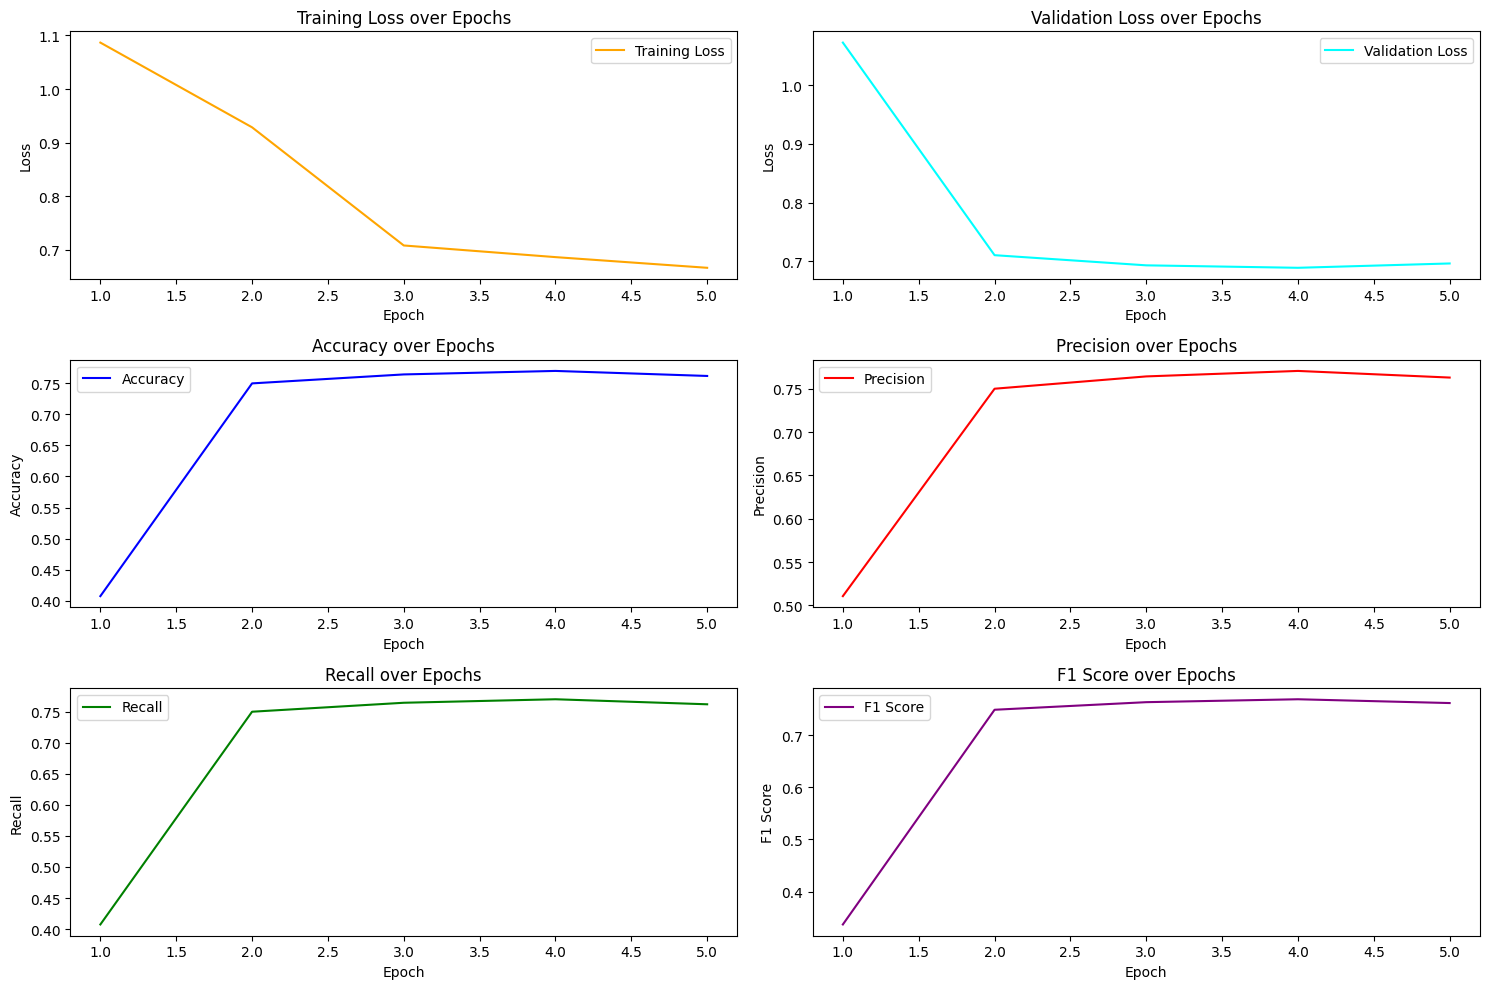

In [65]:
num_epochs = 5

# Reinitialize the model with the best hyperparameters directly
best_model = FakeNewsDetector(vocab_size=vocab_size,
                              embedding_dim=300,
                              hidden_dim=256,
                              output_dim=output_dim,
                              n_layers=2,
                              bidirectional=False,
                              dropout=0.4)

# Reinitialize the optimizer with the best learning rate
optimizer = optim.Adam(best_model.parameters(), lr=9.345722076639682e-05)

# Criterion
criterion = nn.CrossEntropyLoss()

# Train and evaluate model
predicted_labels, true_labels, valid_accuracy = train_and_evaluate(best_model, 
                                                                   train_loader, 
                                                                   test_loader, 
                                                                   criterion, 
                                                                   optimizer, 
                                                                   num_epochs, 
                                                                   True)

### 6.4.2 Performance Metrics Analysis

In [66]:
# Print the evaluation metrics
print_evaluation_metrics(true_labels, predicted_labels)

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.76      0.78      1027
           1       0.74      0.78      0.76       963
           2       0.73      0.75      0.74       854

    accuracy                           0.76      2844
   macro avg       0.76      0.76      0.76      2844
weighted avg       0.76      0.76      0.76      2844

Accuracy: 76.16%
Precision: 0.76
Recall: 0.76
F1-Score: 0.76


# 7 Longformer

#### Libraries Import and Packages Installation

In [74]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.utils.class_weight import compute_class_weight

from transformers import LongformerTokenizer, LongformerForSequenceClassification, get_linear_schedule_with_warmup

from torch.optim import AdamW
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

from tqdm import tqdm

## 7.1 Data Pre-processing

### 7.1.1 Tokenizing, Encoding and Creating Attention Masks

In [75]:
def preprocess_for_longformer(dataframe, tokenizer, max_length=1028):
    """
    Preprocesses the given dataframe for Longformer, concatenating specified columns.

    Parameters:
    dataframe (pd.DataFrame): The dataframe containing the text data.
    tokenizer (LongformerTokenizer): The tokenizer to use for Longformer.
    max_length (int): Maximum length of the tokens.

    Returns:
    Tuple[torch.Tensor, torch.Tensor, torch.Tensor]: Tuple containing input IDs, attention masks, and labels as tensors.
    """
    # Concatenate specified columns
    dataframe['combined_features'] = dataframe['quotes'] + ' [SEP] ' + dataframe['articles'] + ' [SEP] ' + dataframe['sentiment_score'].astype(str)

    # Tokenize and encode the combined features
    encoded_data = tokenizer.batch_encode_plus(
        dataframe['combined_features'].tolist(),
        add_special_tokens=True,
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )

    input_ids = encoded_data['input_ids']
    attention_masks = encoded_data['attention_mask']

    # Extract labels
    labels = torch.tensor(dataframe['facts'].tolist(), dtype=torch.long)

    return input_ids, attention_masks, labels

In [76]:
# Initialize the Longformer tokenizer
tokenizer = LongformerTokenizer.from_pretrained('allenai/longformer-base-4096')

# Preprocess the training data
input_ids_train, attention_masks_train, labels_train = preprocess_for_longformer(train_df, tokenizer)

# Preprocess the validation data
input_ids_valid, attention_masks_valid, labels_valid = preprocess_for_longformer(valid_df, tokenizer)

# Preprocess the test data
input_ids_test, attention_masks_test, labels_test = preprocess_for_longformer(test_df, tokenizer)

### 7.1.2 Create TensorDatasets

In [77]:
train_dataset = TensorDataset(input_ids_train, attention_masks_train, labels_train)
valid_dataset = TensorDataset(input_ids_valid, attention_masks_valid, labels_valid)
test_dataset = TensorDataset(input_ids_test, attention_masks_test, labels_test)

### 7.1.3 Create DataLoaders

In [78]:
batch_size =16

train_dataloader = DataLoader(
    train_dataset, 
    sampler=RandomSampler(train_dataset),  # Randomly sample for training
    batch_size=batch_size
)

validation_dataloader = DataLoader(
    valid_dataset, 
    sampler=SequentialSampler(valid_dataset),  # Sequential sampling for validation
    batch_size=batch_size
)

test_dataloader = DataLoader(
    test_dataset, 
    sampler=SequentialSampler(test_dataset),  # Sequential sampling for testing
    batch_size=batch_size
)

### 7.1.4 Balancing the Dataset with Class Weights

In [79]:
# 'labels' is the column name that contains the class labels
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(politifact_df['facts']),
    y=politifact_df['facts'].values
)

# Convert class weights to a tensor
weights = torch.tensor(class_weights, dtype=torch.float)

# Apply these weights to the loss function
loss_fn = torch.nn.CrossEntropyLoss(weight=weights)

## 7.2 Model Training

### 7.2.1 Loading the Pre-trained Model

In [80]:
# Specify the number of output labels in your classification task
num_labels = train_df['facts'].nunique()

# Load the pre-trained Longformer model with a classification head
model = LongformerForSequenceClassification.from_pretrained(
    'allenai/longformer-base-4096',  # Specify the Longformer model variant
    num_labels=num_labels,  # Number of output labels
    output_attentions=True,  # Whether the model returns attentions weights.
    output_hidden_states=False,  # Whether the model returns all hidden-states.
)

Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### 7.2.2 Define an Optimizer & Learning Rate Scheduler

In [81]:
# Set up the optimizer
optimizer = AdamW(model.parameters(), lr=5e-5, eps=1e-8)

# Number of training epochs
epochs = 1

# Total number of training steps is [number of batches] x [number of epochs]
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=total_steps)

### 7.2.3 Set Up The Training Function

In [82]:
# Train function
def train(model, dataloader, loss_fn):
    model.train()  # Set the model to training mode
    total_loss = 0  # Reset the total loss for this epoch

    # Wrap the dataloader with tqdm for a progress bar
    progress_bar = tqdm(dataloader, desc="Training")

    for step, batch in enumerate(progress_bar):
        # Unpack this training batch from the dataloader and move to the device
        b_input_ids = batch[0]
        b_input_mask = batch[1]
        b_labels = batch[2]

        # Clear any previously calculated gradients
        model.zero_grad()

        # Perform a forward pass (evaluate the model on this training batch)
        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask, 
                        labels=b_labels)
        logits = outputs.logits

        # Calculate the loss using the specified loss function
        loss = loss_fn(logits, b_labels)

        # Accumulate the training loss over all of the batches
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients
        loss.backward()

        # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient
        optimizer.step()

        # Update the learning rate
        scheduler.step()

        # Update the progress bar
        progress_bar.set_postfix({'Training Loss': '{:.3f}'.format(loss.item())})

    # Calculate the average loss over the training data
    avg_train_loss = total_loss / len(dataloader)

    print(f"Training Loss: {avg_train_loss}")

### 7.2.4 Set Up The Evaluation Function

In [83]:
def evaluate(model, dataloader):
    model.eval()  # Set the model to evaluation mode

    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Variables to gather full output
    true_labels = []
    predictions_labels = []

    # Wrap the dataloader with tqdm for a progress bar
    progress_bar = tqdm(dataloader, desc="Evaluating")

    for batch in progress_bar:
        b_input_ids = batch[0]
        b_input_mask = batch[1]
        b_labels = batch[2]

        with torch.no_grad():  # No need to compute gradient in eval mode
            outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        
        loss = outputs.loss
        logits = outputs.logits

        # Move logits and labels to CPU
        logits = logits.detach().cpu()
        label_ids = b_labels.to('cpu')

        # Calculate the accuracy for this batch
        preds = torch.argmax(logits, dim=1).flatten()
        batch_accuracy = (preds == label_ids).numpy().mean() * 100

        # Accumulate the total accuracy and loss
        total_eval_accuracy += batch_accuracy
        total_eval_loss += loss.item()

        # Update the progress bar
        progress_bar.set_postfix({'Validation Loss': '{:.3f}'.format(loss.item())})

        # Track the number of batches
        nb_eval_steps += 1

        # Store predictions and true labels for all batches
        predictions_labels.append(preds.numpy())
        true_labels.append(label_ids.numpy())

    # Calculate the average accuracy and loss over all batches
    avg_val_accuracy = total_eval_accuracy / nb_eval_steps
    avg_val_loss = total_eval_loss / nb_eval_steps

    # Combine the results across all batches
    flat_predictions = np.concatenate(predictions_labels, axis=0)
    flat_true_labels = np.concatenate(true_labels, axis=0)

    return flat_true_labels, flat_predictions, avg_val_accuracy, avg_val_loss

### 7.2.5 Set Up the Training Loop

In [84]:
# patience = 2

# # Early stopping initialization
# best_val_loss = np.inf
# no_improve_epochs = 0

In [85]:
# for epoch in range(epochs):
#     # Training phase
#     train(model, train_dataloader, loss_fn)

#     # Validation phase
#     val_accuracy, val_loss, val_precision, val_recall, val_f1 = evaluate(model, validation_dataloader)

#     print(f"Epoch {epoch + 1}/{epochs} - Validation Loss: {val_loss}")

#     # Check for improvement
#     if val_loss < best_val_loss:
#         best_val_loss = val_loss
#         no_improve_epochs = 0
#         # Save the best model
#         torch.save(model.state_dict(), 'best_bert_model.bin')
#     else:
#         no_improve_epochs += 1
#         if no_improve_epochs >= patience:
#             print("Early stopping triggered")
#             break

## 7.3 Model Testing

### 7.3.1 Loading the Best Model

In [86]:
model.load_state_dict(torch.load('best_bert_model.bin'))
model.eval()

LongformerForSequenceClassification(
  (longformer): LongformerModel(
    (embeddings): LongformerEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
      (position_embeddings): Embedding(4098, 768, padding_idx=1)
    )
    (encoder): LongformerEncoder(
      (layer): ModuleList(
        (0-11): 12 x LongformerLayer(
          (attention): LongformerAttention(
            (self): LongformerSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (query_global): Linear(in_features=768, out_features=768, bias=True)
              (key_global): Linear(in_features=768, out_features=768, bias=True)
          

### 7.3.2 Evaluate on Test Data

In [87]:
true_labels, predicted_labels, avg_val_accuracy, avg_val_loss = evaluate(model, test_dataloader)

Evaluating: 100%|██████| 178/178 [53:24<00:00, 18.00s/it, Validation Loss=0.686]


In [88]:
print_evaluation_metrics(true_labels, predicted_labels)

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.63      0.68      1027
           1       0.54      0.65      0.59       963
           2       0.66      0.61      0.64       854

    accuracy                           0.63      2844
   macro avg       0.64      0.63      0.63      2844
weighted avg       0.64      0.63      0.63      2844

Accuracy: 63.22%
Precision: 0.64
Recall: 0.63
F1-Score: 0.63


## 7.4 Model Inference

### 7.4.1 Defining an Inference Function

In [89]:
def predict(input_text, tokenizer, model, max_length=1028):
    """
    Make a prediction on a single sentence.

    Args:
    input_text (str): A text string to be classified.
    tokenizer (BertTokenizer): The tokenizer used for BERT model.
    model (torch.nn.Module): The trained BERT model.
    max_length (int): Maximum length of the tokens.

    Returns:
    int: The predicted class label.
    """

    # Tokenize and encode the input text
    encoded_dict = tokenizer.encode_plus(
        input_text,
        add_special_tokens=True,
        max_length=max_length,
        truncation=True,
        padding='max_length',
        return_attention_mask=True,
        return_tensors='pt'
    )

    # Move the encoded text to the same device as the model
    input_ids = encoded_dict['input_ids']
    attention_mask = encoded_dict['attention_mask']

    # Inference
    with torch.no_grad():
        outputs = model(input_ids, token_type_ids=None, attention_mask=attention_mask)
    
    # Get the predicted class (the one with the highest probability)
    prediction = torch.argmax(outputs.logits, dim=1).cpu().numpy()[0]

    return prediction

### 7.4.2 Make Predictions

In [92]:
fake_news = '''Rumors have surfaced claiming that a secret society of world leaders controls global politics from a hidden location beneath the Arctic ice. Alleged leaked documents suggest this clandestine group has been influencing major political events, including elections and policy decisions, for decades. The documents, which appeared on several conspiracy theory websites, contain detailed accounts of meetings and rituals supposedly aimed at shaping the future of international relations. Government officials around the world have dismissed these claims as baseless, emphasizing the importance of transparency and democracy in global governance. Critics argue that the so-called evidence is nothing more than an elaborate fabrication designed to sow distrust in political institutions.'''
real_news = '''In a historic move, the legislative bodies of over 120 countries have unanimously passed a resolution to enhance global cooperation in the fight against corruption and money laundering. This landmark decision, made during the annual International Summit on Governance, aims to establish a unified legal framework to prevent financial crimes and ensure accountability for corrupt officials. The resolution includes measures to improve transparency in financial transactions, enhance the exchange of information between countries, and support nations in developing robust anti-corruption laws. Political analysts have lauded this global initiative as a crucial step towards creating a more equitable and just world order, emphasizing the collective responsibility to combat corruption.'''
mixed_news = '''In a surprising development, a spokesperson for the Global Economic Forum announced the discovery of an ancient tablet, purportedly containing the lost constitution of Atlantis, which outlines a utopian society free from corruption and inequality. According to the spokesperson, the tablet's principles could revolutionize modern governance. However, experts quickly pointed out inconsistencies in the claim, noting the lack of archaeological evidence for Atlantis's existence and accusing the forum of using the story to divert attention from pressing economic issues. While the notion of discovering such an artifact has captured the public's imagination, historians and political scientists emphasize the importance of focusing on realistic and practical solutions to today's governance challenges.'''

In [93]:
input_text = real_news
predicted_class = predict(input_text, tokenizer, model)

print("Predicted Class:", predicted_class)

Predicted Class: 2


In [94]:
input_text = mixed_news
predicted_class = predict(input_text, tokenizer, model)

print("Predicted Class:", predicted_class)

Predicted Class: 0
